In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\pc\\Desktop\\jupyter_notebook\\abloane.csv')

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.shape

(4177, 9)

In [5]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

# categorical data convert into numerical data

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
df['Sex'] = le.fit_transform(df['Sex'])

In [8]:
le.inverse_transform([0,1,2])

array(['F', 'I', 'M'], dtype=object)

In [9]:
df['Sex'].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

In [11]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

no null values

no object type data or categorical data convert into numerical data

In [12]:
df.dtypes

Sex                 int32
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

# now lets check 

data has skewness

chek outliers

chek correlation

In [13]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

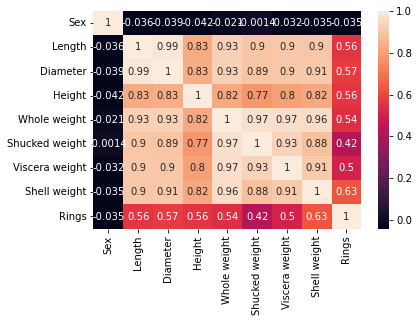

In [63]:
sns.heatmap(df.corr(),annot=True)

In [15]:
df_features = df.drop(['Length'],axis=1)

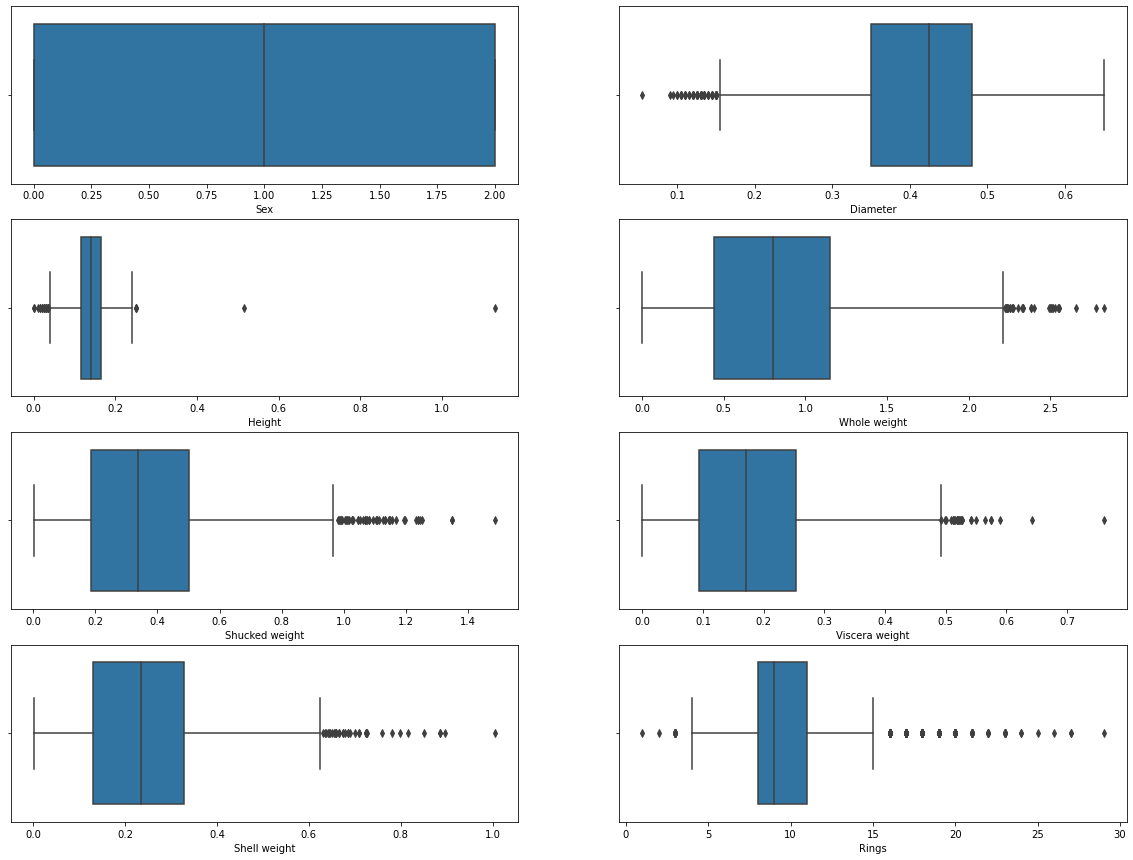

In [16]:
plt.figure(figsize=(20,15))
graph = 1
for column in df_features:
    if graph<=8:
        ax = plt.subplot(4,2,graph)
        sns.boxplot(df_features[column],orient='v')
        plt.xlabel(column,fontsize=10)
        
        
        
        graph+=1
plt.show()

In [17]:
df.shape

(4177, 9)

In [18]:
from scipy.stats import zscore

In [19]:
z = np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
         166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
         238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
         334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
         433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
         674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
         754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
        1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
        1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
        1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
        1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
        2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
        2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
        2436, 2459, 2471, 2544, 2623, 

In [20]:
df_new_z = df[(z<3).all(axis=1)]
df_new_z

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


chek the distribution

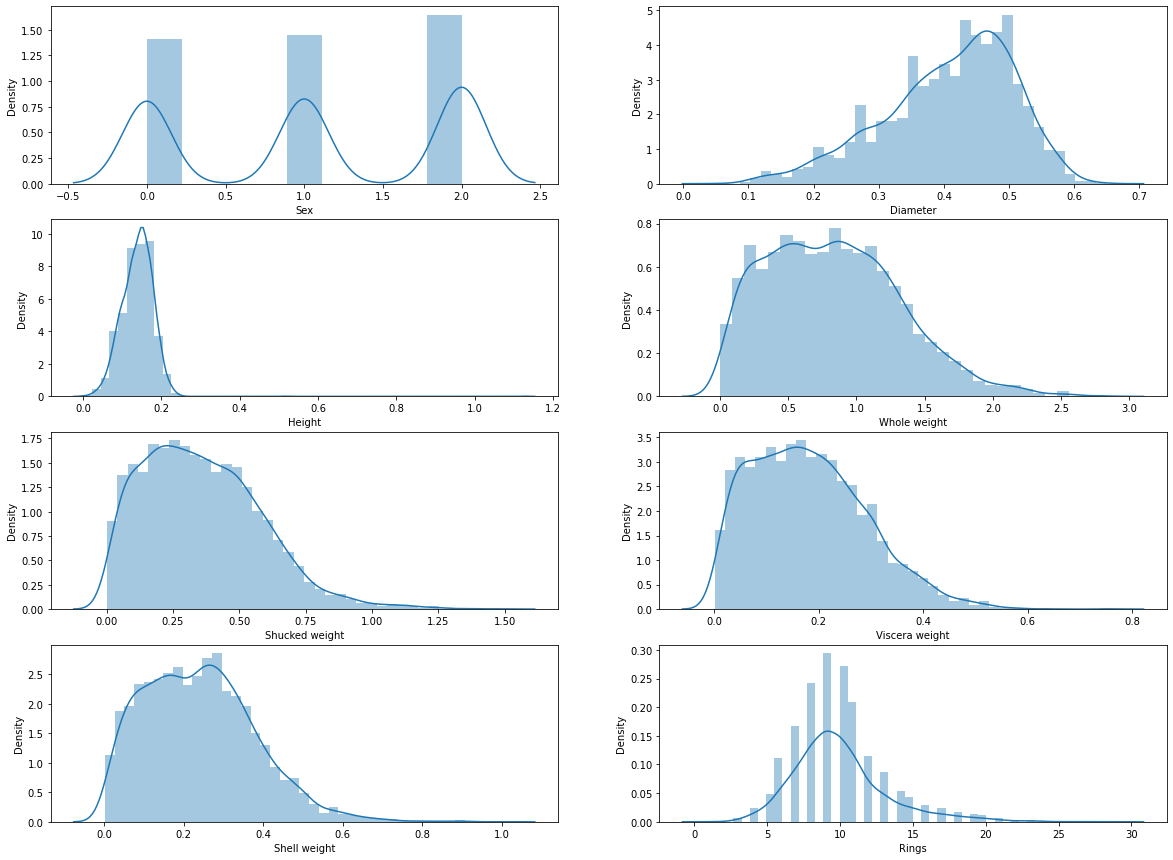

In [21]:
plt.figure(figsize=(20,15))
graph = 1
for column in df_features:
    if graph<=8:
        ax = plt.subplot(4,2,graph)
        sns.distplot(df_features[column])
        plt.xlabel(column,fontsize=10)
        
        
        
        graph+=1
plt.show()

In [22]:
x = df.drop(['Length'],axis=1)
y = df['Length']

In [23]:
x.skew().sort_values(ascending=False)

Height            3.128817
Rings             1.114102
Shucked weight    0.719098
Shell weight      0.620927
Viscera weight    0.591852
Whole weight      0.530959
Sex              -0.098155
Diameter         -0.609198
dtype: float64

In [24]:
from sklearn.preprocessing import power_transform
x_p = power_transform(x)
x_p

array([[ 1.12707158, -0.54986033, -1.12451192, ..., -0.69328289,
        -0.587809  ,  1.48235844],
       [ 1.12707158, -1.38733299, -1.26439579, ..., -1.33295268,
        -1.33241968, -0.94913462],
       [-1.30793479,  0.00853714, -0.06482301, ..., -0.25513514,
        -0.09826193, -0.17607507],
       ...,
       [ 1.12707158,  0.64519089,  1.56508168, ...,  1.01560749,
         0.59839786, -0.17607507],
       [-1.30793479,  0.76992788,  0.30708344, ...,  0.81518436,
         0.51914542,  0.15690844],
       [ 1.12707158,  1.72628889,  1.34794324, ...,  1.61134422,
         1.65848824,  0.74460653]])

In [25]:
pd.DataFrame(x_p,columns = x.columns).skew().sort_values(ascending=False)

Viscera weight    0.039780
Shucked weight    0.027351
Shell weight      0.023390
Rings             0.004429
Whole weight     -0.003980
Diameter         -0.065977
Height           -0.115483
Sex              -0.176442
dtype: float64

In [26]:
sk = x.skew()
sk

Sex              -0.098155
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [27]:
sk[np.abs(sk)>0.25]

Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [28]:
x.skew()[np.abs(x.skew())<0.25].all()#acceptable skewness

True

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.linear_model import LinearRegression

In [30]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [31]:
x_scaled.shape[1]

8

In [32]:
vif  = pd. DataFrame()

In [33]:
vif['vif'] = [variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]

In [34]:
vif["features"] = x.columns

In [35]:
vif

,vif,features
0,1.011133,Sex
1,8.512346,Diameter
2,3.608124,Height
3,113.772780,Whole weight
4,32.402776,Shucked weight
5,17.463000,Viscera weight
6,21.531254,Shell weight
7,2.117775,Rings


In [36]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=1)

In [37]:
lr = LinearRegression()
lr.fit(x_train,y_train)



LinearRegression()

In [38]:
lr.predict(scaler.transform([[0,0.485,0.150,1.0945,0.5310,0.2610,0.296,10]]))

array([0.61741794])

In [39]:
df.tail(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.296,10
4176,2,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12


In [40]:
lr.score(x_train,y_train)

0.9755283718324071

In [41]:
lr.score(x_test,y_test)

0.9752193845439892

In [42]:
y_pred = lr.predict(x_test)

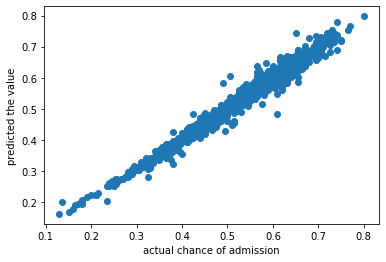

In [43]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual chance of admission')
plt.ylabel('predicted the value')
plt.show()

# model evalution

In [44]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [45]:
y_pred = lr.predict(x_test)

In [46]:
mean_absolute_error(y_test,y_pred)

0.0135444618033681

In [47]:
mean_squared_error(y_test,y_pred)

0.0003466427245209759

In [48]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.01861834376417451

# you have sucessfully buliding modellinear regression model
regularization

In [49]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [50]:
lassocv = LassoCV(alphas = None,max_iter=100,normalize=True)

In [51]:
lassocv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [52]:
alpha = lassocv.alpha_

In [53]:
alpha

2.128111544639502e-06

In [54]:
lasso_reg = Lasso(alpha)

In [55]:
lasso_reg.fit(x_train,y_train)

Lasso(alpha=2.128111544639502e-06)

In [56]:
lasso_reg.score(x_test,y_test)

0.9752166517786961

# using ridge regression model

In [57]:
ridgecv = RidgeCV(alphas = np.arange(0.0001,0.1,0.001),normalize=True)

In [58]:
ridgecv.fit(x_train,y_train)
ridgecv.alpha_

0.0001

In [59]:
ridgecv.alpha_

0.0001

In [60]:
ridge_model = Ridge(alpha=ridgecv.alpha_)

In [61]:
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.0001)

In [62]:
ridge_model.score(x_test,y_test)

0.9752193864877126